### For this week and next, use this dataset to perform the following tasks:
- Exploratory data analysis
- Visualizations 
- Feature engineering
- Feature selection
- Hyperparameter tuning (random and grid search etc)
- Evaluation scores
- Presentation and documentation

### You may refer to the code section on how other people are doing their analysis and baseline model building. The data for training is application_train.csv for training and the data for testing is application_test.csv for evaluation. The team formation is only for discussion and presentation purposes, you need to do all these tasks by yourself.


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Importing the dataset

In [28]:
df = pd.read_csv('application_train.csv')
print(df.shape)

df.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- The dataset has 122 columns and 307511 rows where each row represents a loan application
- The column TARGET denotes the desired output i.e. whether there was difficulty paying loan or not
- The first column SK_ID_CURR is identifying columns across multiple files

In [29]:
# Ignoring first column and appointing target column to df target
target = df.TARGET
df = df.iloc[:,1:]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 283.9+ MB


- The dataframe contains all type of data: numbers (floats and int) and objects

In [30]:
print(df.columns)

Index(['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)


0    282686
1     24825
Name: TARGET, dtype: int64


(array([282686.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  24825.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

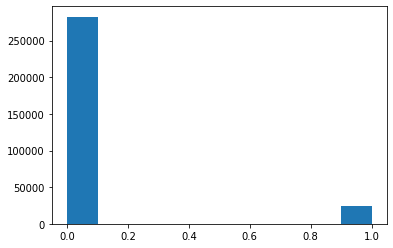

In [31]:
print(df.TARGET.value_counts())

plt.hist(df.TARGET.astype(int))

- The dataset is imbalanced

In [32]:
df.describe()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,-7479.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,-4504.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,-2010.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [33]:
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

- Since there are categorical types as well, we encode them 

In [34]:
# Create a label encoder object
encoder = LabelEncoder()
le_count = []

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            le.fit(df[col])
            df[col] = le.transform(df[col])
            # Keep track of how many columns were label encoded
            le_count.append(col)
            
print('columns', le_count,'were label encoded')

columns ['NAME_CONTRACT_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'] were label encoded


In [35]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,M,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,M,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,F,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,M,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
df.tail()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,0,0,M,0,0,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,0,0,F,0,1,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,0,0,F,0,1,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,0,F,0,1,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,0,0,F,0,0,0,157500.0,675000.0,49117.5,675000.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [37]:
df.isnull().sum(axis=0).sort_values(ascending=False).head(10)

COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_AVG     213514
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MODE       210199
dtype: int64

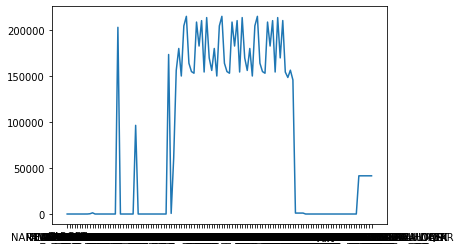

In [38]:

plt.plot(df.isnull().sum(axis=0))

- Some columns contain null values. The max number of null values is 214865 (out of 307511 which is almost 70%).

In [39]:
print(df.isnull().sum(axis=1).sort_values(ascending=False))

185713    61
133770    61
197736    61
116937    61
269492    61
          ..
129942     0
129929     0
129924     0
129911     0
153755     0
Length: 307511, dtype: int64


- Some rows are only half filled (61 out of 122 columns).

In [40]:
df.iloc[185713]

TARGET                          0
NAME_CONTRACT_TYPE              1
CODE_GENDER                     M
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
                             ... 
AMT_REQ_CREDIT_BUREAU_DAY     NaN
AMT_REQ_CREDIT_BUREAU_WEEK    NaN
AMT_REQ_CREDIT_BUREAU_MON     NaN
AMT_REQ_CREDIT_BUREAU_QRT     NaN
AMT_REQ_CREDIT_BUREAU_YEAR    NaN
Name: 185713, Length: 121, dtype: object

In [41]:
df.isnull().sum(axis=0).sort_values(ascending=False).head(15)

df.fillna(df.median())

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,M,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,F,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,M,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,F,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,M,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,M,0,0,0,157500.0,254700.0,27558.0,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307507,0,0,F,0,1,0,72000.0,269550.0,12001.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307508,0,0,F,0,1,0,153000.0,677664.0,29979.0,585000.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,1,0,F,0,1,0,171000.0,370107.0,20205.0,319500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


- Our data still had some NaN values so we replaced these with the median from the column

In [42]:
owns_car = df.FLAG_OWN_CAR.value_counts()
print(owns_car)
print('-----------------------------------')

owns_realty = df.FLAG_OWN_REALTY.value_counts()
print(owns_realty)
print('-----------------------------------')

gender = df.CODE_GENDER.value_counts()
print(gender)
print('-----------------------------------')

0    202924
1    104587
Name: FLAG_OWN_CAR, dtype: int64
-----------------------------------
1    213312
0     94199
Name: FLAG_OWN_REALTY, dtype: int64
-----------------------------------
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
-----------------------------------


In [43]:
car_and_gender = df[df.FLAG_OWN_CAR == 1].CODE_GENDER.value_counts()
print(car_and_gender)

realty_and_gender = df[df.FLAG_OWN_REALTY == 1].CODE_GENDER.value_counts()
print(realty_and_gender)

M      59626
F      44959
XNA        2
Name: CODE_GENDER, dtype: int64
F      143415
M       69893
XNA         4
Name: CODE_GENDER, dtype: int64


- More males own cars whereas more females own realty

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
8          2
9          2
10         2
12         2
19         2
11         1
Name: CNT_CHILDREN, dtype: int64


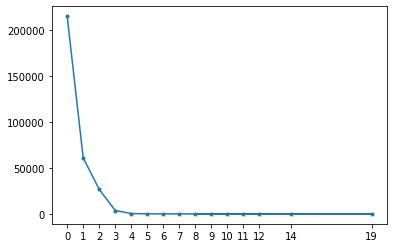

In [44]:
children_count = df.CNT_CHILDREN.value_counts()
print(children_count)

plt.xticks(children_count.index)
plt.plot(children_count, '.-')

- Most of the applicants do not have any children. The max number of children any applicants had was 19.

In [45]:
corr = df.corr()
display(corr)

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,1.000000,-0.030896,-0.021851,-0.006148,0.019187,-0.003982,-0.030369,-0.012817,-0.039645,-0.037227,...,-0.007952,-0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,-0.012462,-0.002022,0.019930
NAME_CONTRACT_TYPE,-0.030896,1.000000,0.004022,0.067177,0.029998,-0.003531,-0.221648,-0.241544,-0.185850,0.026867,...,-0.007530,-0.005190,-0.007308,0.055821,0.000453,-0.005118,-0.015296,-0.014369,-0.021962,-0.052494
FLAG_OWN_CAR,-0.021851,0.004022,1.000000,-0.002817,0.102023,0.083383,0.116225,0.141588,0.120310,0.041314,...,-0.000097,0.002184,0.007299,0.006741,0.002669,0.000572,0.000242,0.020477,-0.009936,-0.036345
FLAG_OWN_REALTY,-0.006148,0.067177,-0.002817,1.000000,-0.002366,0.002934,-0.039270,-0.005225,-0.045537,0.015175,...,-0.087687,-0.019364,-0.025130,-0.000173,-0.004120,-0.009267,0.007474,-0.004480,0.015451,0.067451
CNT_CHILDREN,0.019187,0.029998,0.102023,-0.002366,1.000000,0.012882,0.002145,0.021374,-0.001827,-0.025573,...,0.004031,0.000864,0.000988,-0.002450,-0.000410,-0.000366,-0.002436,-0.010808,-0.007836,-0.041550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,0.002704,-0.005118,0.000572,-0.009267,-0.000366,0.002944,0.004238,0.002185,0.004677,0.001399,...,0.013281,0.001126,-0.000120,-0.001130,0.230374,1.000000,0.217412,-0.005258,-0.004416,-0.003355
AMT_REQ_CREDIT_BUREAU_WEEK,0.000788,-0.015296,0.000242,0.007474,-0.002436,0.002387,-0.001275,0.013881,-0.001007,-0.002149,...,-0.004640,-0.001275,-0.001770,0.000081,0.004706,0.217412,1.000000,-0.014096,-0.015115,0.018917
AMT_REQ_CREDIT_BUREAU_MON,-0.012462,-0.014369,0.020477,-0.004480,-0.010808,0.024700,0.054451,0.039148,0.056422,0.078607,...,-0.001565,-0.002729,0.001285,-0.003612,-0.000018,-0.005258,-0.014096,1.000000,-0.007789,-0.004975
AMT_REQ_CREDIT_BUREAU_QRT,-0.002022,-0.021962,-0.009936,0.015451,-0.007836,0.004859,0.015925,0.010124,0.016432,-0.001279,...,-0.005125,-0.001575,-0.001010,-0.002004,-0.002716,-0.004416,-0.015115,-0.007789,1.000000,0.076208


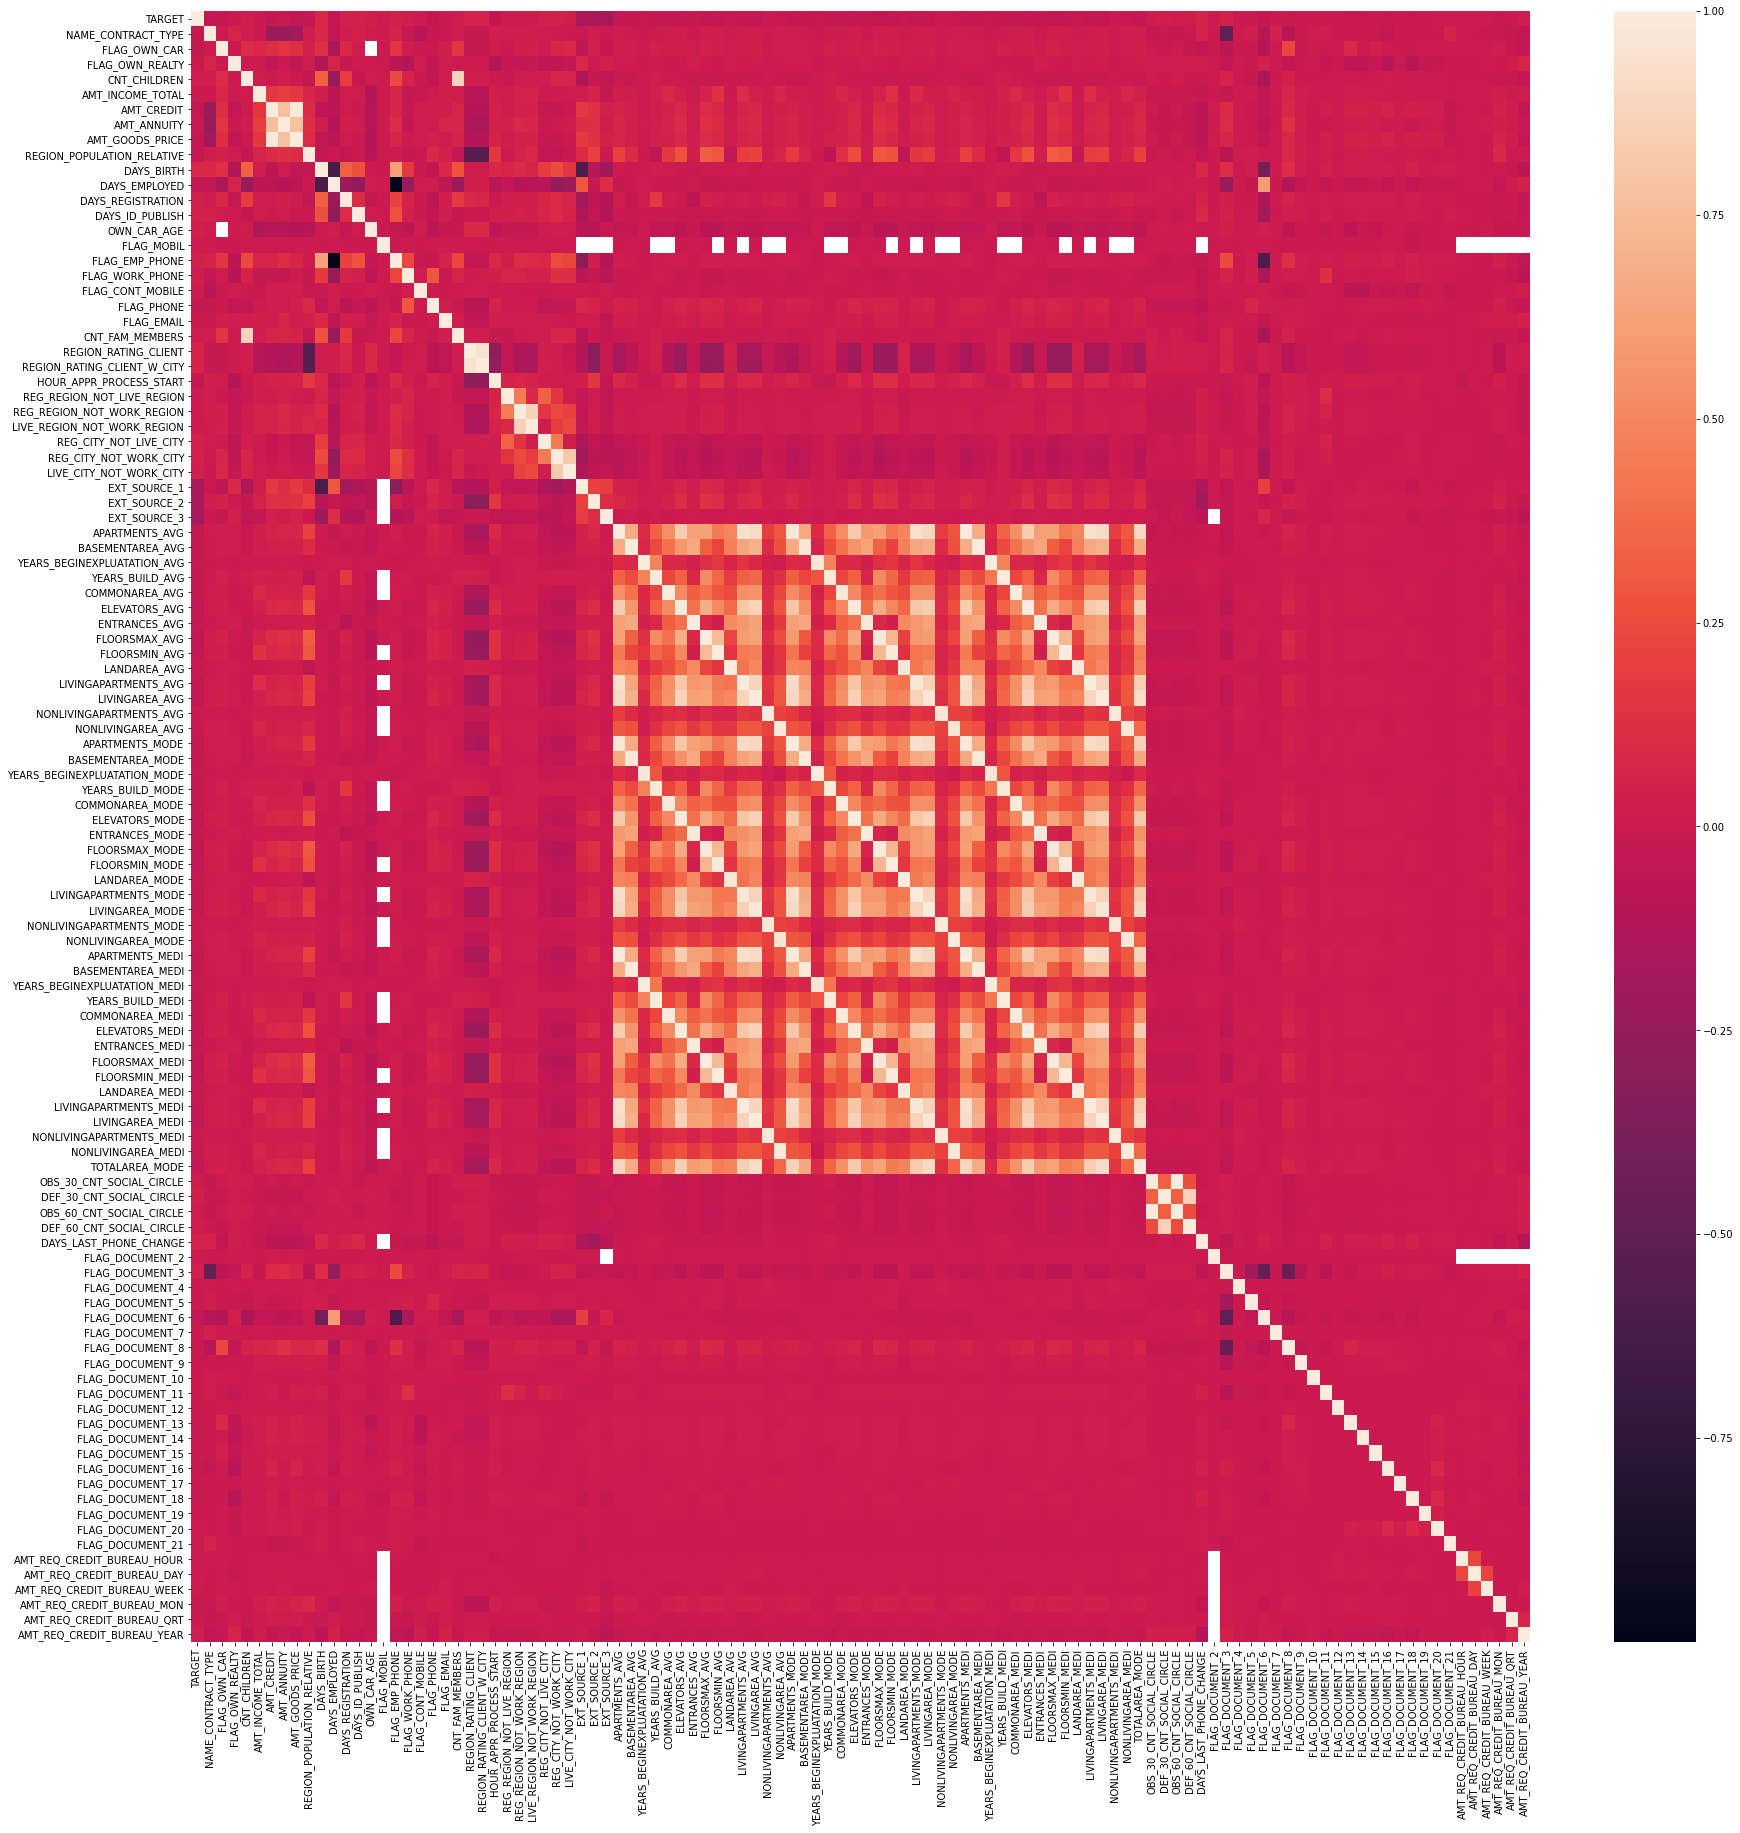

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))

sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

- Most of the values seem to have little to no correlation with the target column

(307511, 79)


<AxesSubplot:>

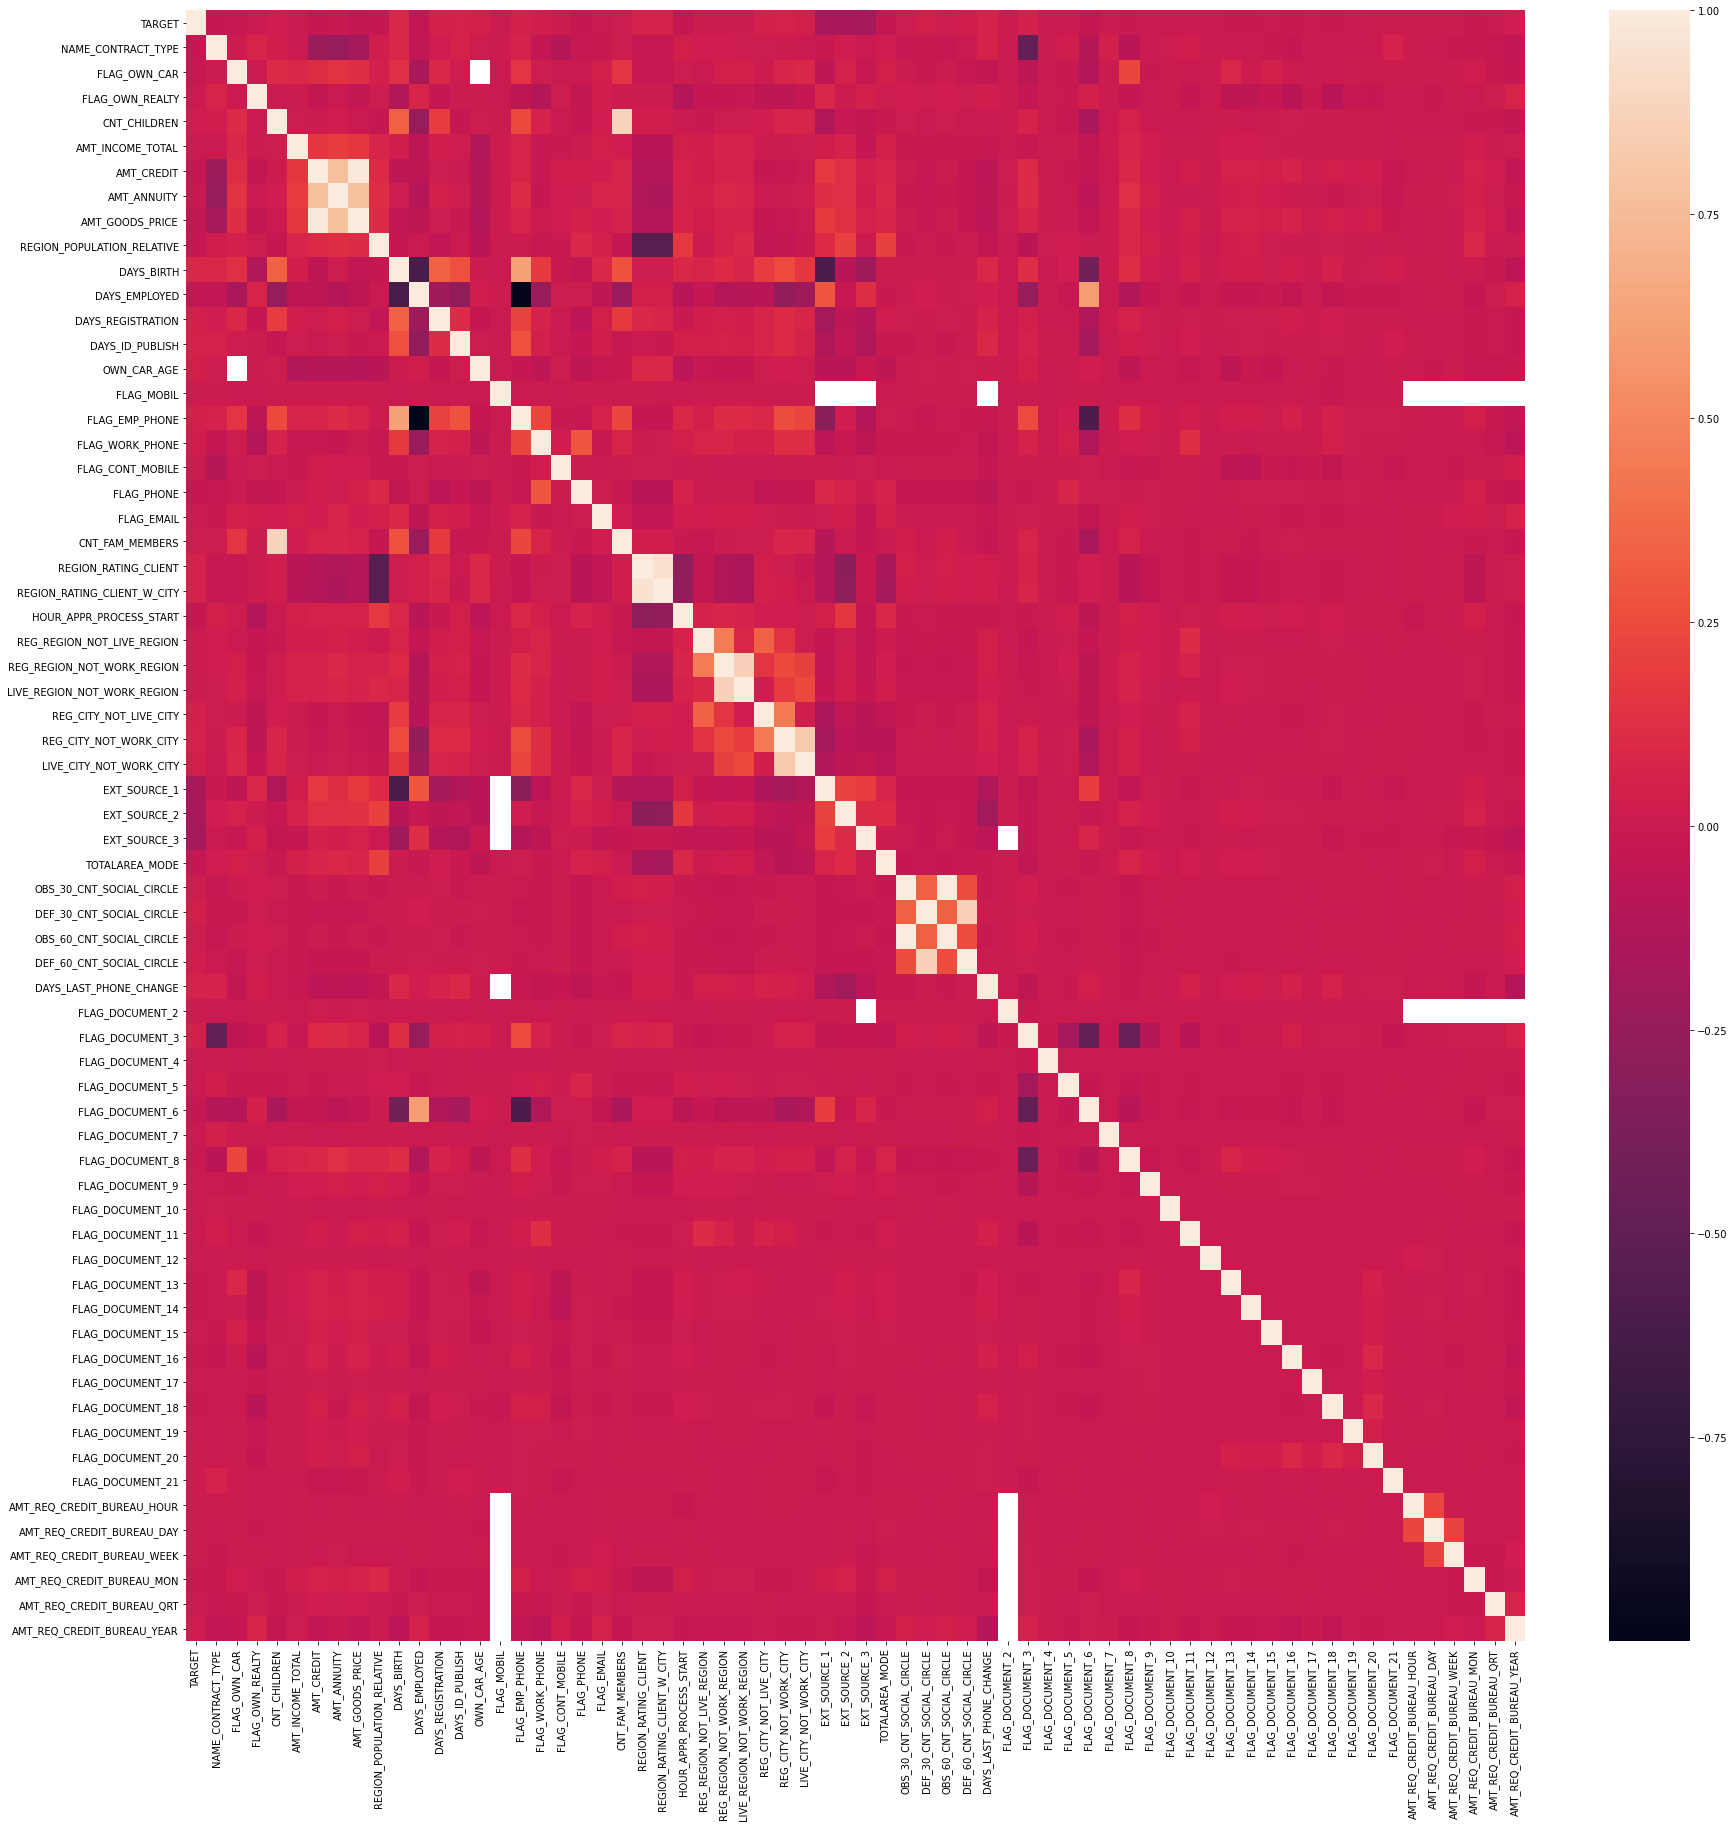

In [47]:
df_dropped = df.drop(df.columns[43:85], axis=1)

print(df_dropped.shape)

corr_dropped = df_dropped.corr()

fig, ax = plt.subplots(1, 1, figsize=(30, 30))

sns.heatmap(corr_dropped, 
            xticklabels=corr_dropped.columns.values,
            yticklabels=corr_dropped.columns.values)

- It appears that most of the columns have little to no significant correlation with the target column. Thus to make the dataset managable, we set a threshold and discard all the columns which do not demonstrate a good correlation with the set.

In [48]:
target_corr = corr_dropped.iloc[0]
target_corr_list = target_corr[abs(target_corr) > 0.005]
train_df = df[target_corr_list.index.values]
display(train_df)

,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_18,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,0,1,0,406597.5,24700.5,351000.0,0.018801,-9461,...,1,0,0,0,0,0,0,0,0.0,1.0
1,0,0,0,0,0,1293502.5,35698.5,1129500.0,0.003541,-16765,...,1,0,0,0,0,0,0,0,0.0,0.0
2,0,1,1,1,0,135000.0,6750.0,135000.0,0.010032,-19046,...,0,0,0,0,0,0,0,0,0.0,0.0
3,0,0,0,1,0,312682.5,29686.5,297000.0,0.008019,-19005,...,1,0,0,0,0,0,0,0,NaN,NaN
4,0,0,0,1,0,513000.0,21865.5,513000.0,0.028663,-19932,...,0,0,1,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,254700.0,27558.0,225000.0,0.032561,-9327,...,0,0,1,0,0,0,0,0,NaN,NaN
307507,0,0,0,1,0,269550.0,12001.5,225000.0,0.025164,-20775,...,1,0,0,0,0,0,0,0,NaN,NaN
307508,0,0,0,1,0,677664.0,29979.0,585000.0,0.005002,-14966,...,1,0,0,0,0,0,0,0,1.0,1.0
307509,1,0,0,1,0,370107.0,20205.0,319500.0,0.005313,-11961,...,1,0,0,0,0,0,0,0,0.0,0.0


<AxesSubplot:>

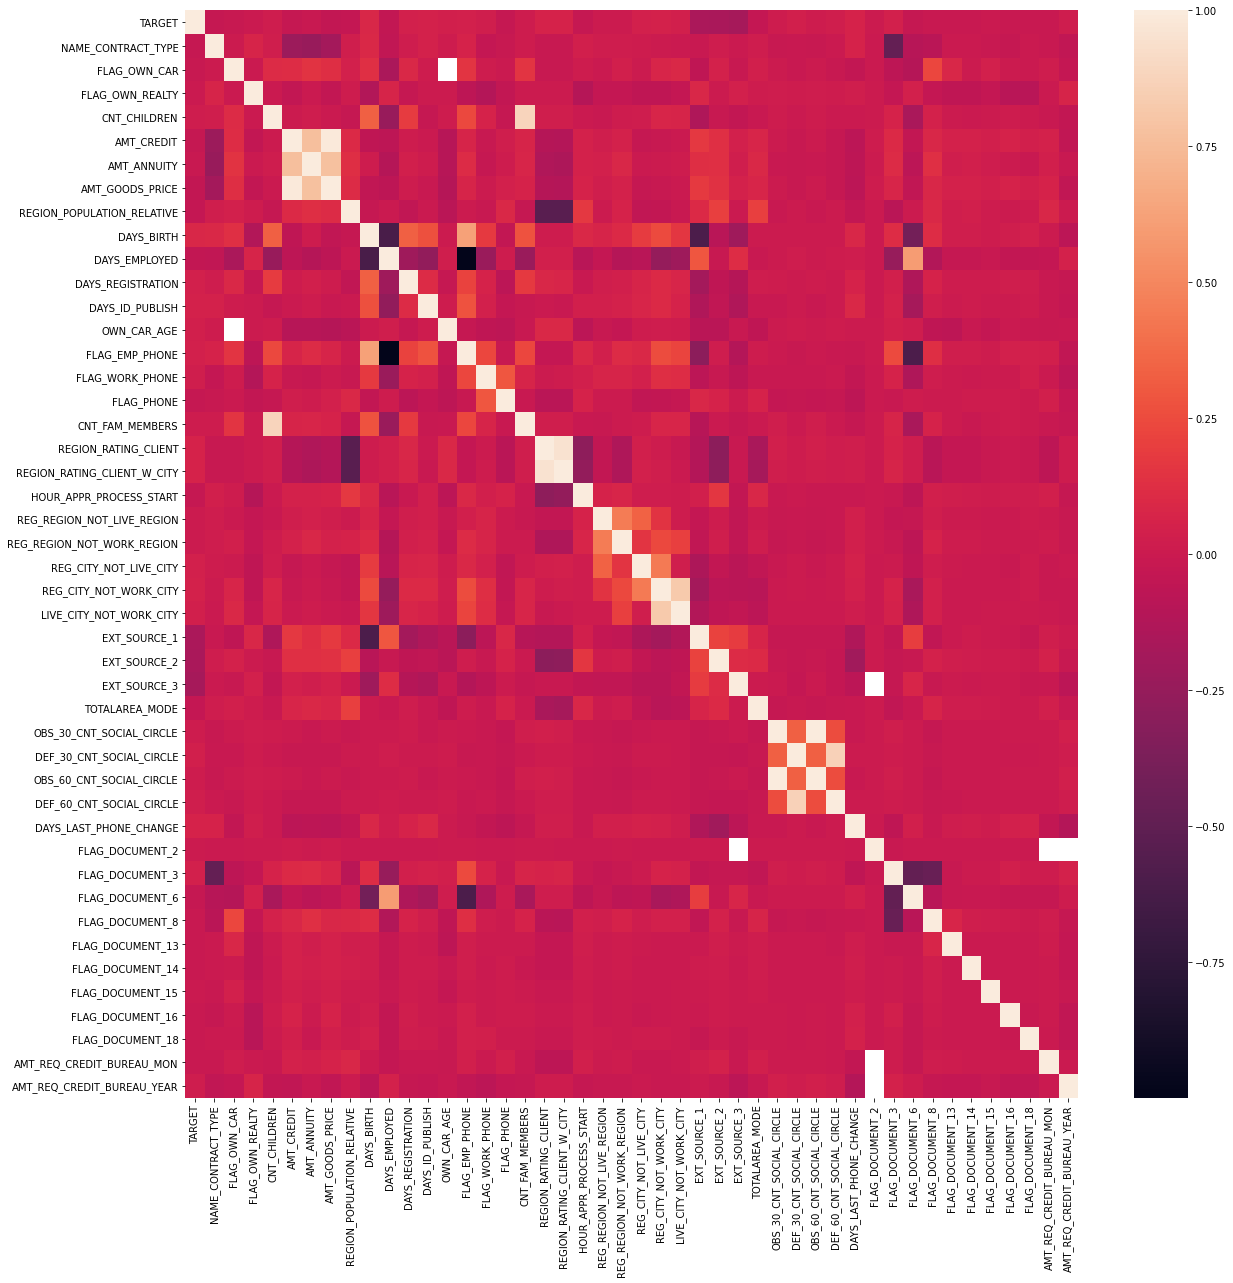

In [49]:
corr = train_df.corr()

fig, ax = plt.subplots(1, 1, figsize=(20, 20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)